In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [51]:
# read json file as pandas dataframe
data = pd.read_json("../data/trades.json")
data.set_index('timestamp', inplace=True)

In [44]:
# check best bid for ametysts
amethysts = data[data['symbol'] == 'AMETHYSTS']
# get min price for amethysts
amethysts.sort_values('price', ascending=False).head(30)

,buyer,seller,symbol,currency,price,quantity
timestamp,,,,,,
1466200,,,AMETHYSTS,SEASHELLS,10005,2
64900,,,AMETHYSTS,SEASHELLS,10005,2
2806900,,,AMETHYSTS,SEASHELLS,10005,7
723400,,,AMETHYSTS,SEASHELLS,10005,1
1715200,,,AMETHYSTS,SEASHELLS,10005,1
2945000,,,AMETHYSTS,SEASHELLS,10005,2
1944400,,,AMETHYSTS,SEASHELLS,10005,9
2806600,,,AMETHYSTS,SEASHELLS,10005,9
2540700,,,AMETHYSTS,SEASHELLS,10005,10


In [47]:
# get all trades we sold
amethysts = data[data['symbol'] == 'AMETHYSTS']
starfruit = data[data['symbol'] == 'STARFRUIT']
sold_AMETHYSTS = amethysts[amethysts['seller'] == 'SUBMISSION']
bought_AMETHYSTS = amethysts[amethysts['buyer'] == 'SUBMISSION']
sold_STARFRUIT = starfruit[starfruit['seller'] == 'SUBMISSION']
bought_STARFRUIT = starfruit[starfruit['buyer'] == 'SUBMISSION']

In [48]:
print(f"We bought AMETHYSTS for: {bought_AMETHYSTS['price'].min()} - {bought_AMETHYSTS['price'].max()}")
print(f"We sold AMETHYSTS: {sold_AMETHYSTS['price'].min()} - {sold_AMETHYSTS['price'].max()}")
print(f"We bought STARFRUIT: {bought_STARFRUIT['price'].min()} - {bought_STARFRUIT['price'].max()}")
print(f"We sold STARFRUIT: {sold_STARFRUIT['price'].min()} - {sold_STARFRUIT['price'].max()}")

We bought AMETHYSTS for: 9998 - 9998
We sold AMETHYSTS: 10002 - 10002
We bought STARFRUIT: nan - nan
We sold STARFRUIT: nan - nan


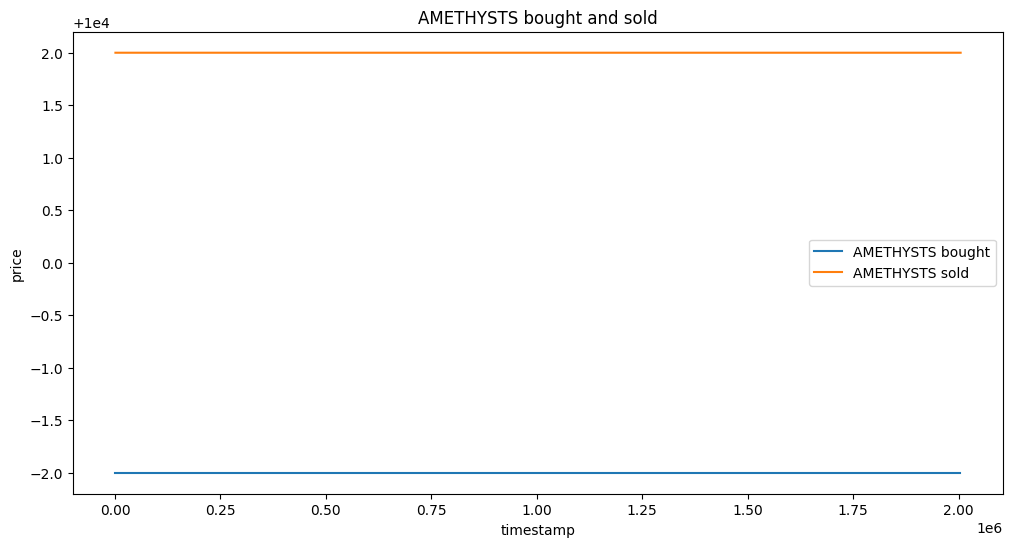

In [49]:
# draw a plot of the price by timestamp for amethysts bought and sold
plt.figure(figsize=(12, 6))
plt.plot(bought_AMETHYSTS.index, bought_AMETHYSTS['price'], label='AMETHYSTS bought')
plt.plot(sold_AMETHYSTS.index, sold_AMETHYSTS['price'], label='AMETHYSTS sold')
plt.legend()
plt.title('AMETHYSTS bought and sold')
plt.xlabel('timestamp')
plt.ylabel('price')
plt.show()


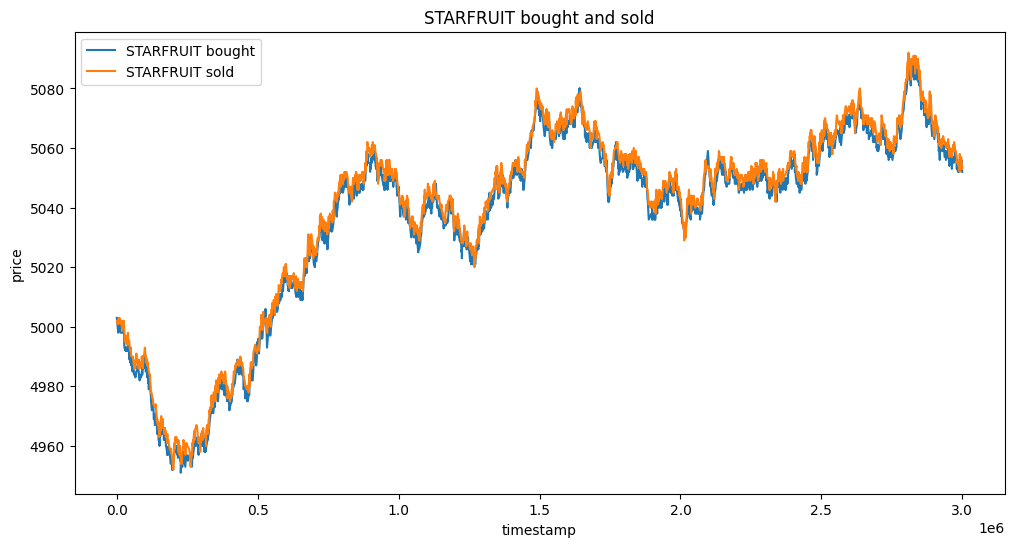

In [29]:
# same for starfruit
plt.figure(figsize=(12, 6))
plt.plot(bought_STARFRUIT.index, bought_STARFRUIT['price'], label='STARFRUIT bought')
plt.plot(sold_STARFRUIT.index, sold_STARFRUIT['price'], label='STARFRUIT sold')
plt.legend()
plt.title('STARFRUIT bought and sold')
plt.xlabel('timestamp')
plt.ylabel('price')
plt.show()


In [35]:
df = pd.read_csv("../data/prices_round_1_day_0.csv", sep=';')

In [40]:
df = df[df['product'] == 'AMETHYSTS']
df["bid_price_1"].max()

10002

In [38]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
2,0,100,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
4,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,0.0
7,0,300,AMETHYSTS,9996,2,9995.0,23.0,NaN,NaN,9998,3,10004.0,2.0,10005.0,23.0,9997.0,0.0
8,0,400,AMETHYSTS,9998,5,9996.0,2.0,9995.0,23.0,10004,2,10005.0,23.0,NaN,NaN,10001.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,0,999500,AMETHYSTS,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0
19993,0,999600,AMETHYSTS,9996,2,9995.0,27.0,NaN,NaN,10002,3,10004.0,2.0,10005.0,27.0,9999.0,0.0
19994,0,999700,AMETHYSTS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
